### Tables Of Contents <a class="anchor" id="table_of_contents"></a>

* [Need To Install](#chapter1)
* [libraries used](#chapter2)
* [files used](#chapter3)
* [Bar Graph](#chapter4)
* [Bar Graph V2](#chapter5)
* [Bar Graph V3](#chapter6)
* [Distribution Graph](#chapter7)
* [BoxPlot](#chapter8)
* [BoxPlot V2](#chapter9)
* [Violin plot](#chapter10)
* [Violin plot V2](#chapter11)
* [Density Plot](#chapter12)
* [Density Plot V2](#chapter13)
* [Waffle chart](#chapter14)
* [Pie chart](#chapter15)
* [Tree map](#chapter16)
* [Scatter plot with linear regression line](#chapter17)
* [Scatter plot with linear regression line V2](#chapter18)
* [Jitter Plot](#chapter19)
* [Counts Plot](#chapter20)
* [Lolipop chart](#chapter21)
* [Dot chart](#chapter22)
* [Histogram for continuous variable](#chapter23)
* [Histogram for continuous variable V2](#chapter24)
* [Timeseries](#chapter25)
* [Timeseries V2 (with peaks)](#chapter26)
* [Seasonal plot](#chapter27)

        
        

### Need To Install <a class="anchor" id="chapter1"></a>

<code>
!pip install pywaffle
!pip install squarify
</code>

[Go back to the Table of Contents](#table_of_contents)

### libraries used <a class="anchor" id="chapter2"></a>

[Go back to the Table of Contents](#table_of_contents)

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pywaffle import Waffle
from matplotlib.patches import Patch
import squarify
from scipy.signal import find_peaks
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
import matplotlib.patches as patches


### Files Used<a class="anchor" id="chapter3"></a>

[Go back to the Table of Contents](#table_of_contents)

In [169]:
file = "C:/Users/doron/Downloads/cars.csv" 
file2 = "C:/Users/doron/Downloads/AirPassengers.csv"


### Bar Graph<a class="anchor" id="chapter4"></a>

[Go back to the Table of Contents](#table_of_contents)

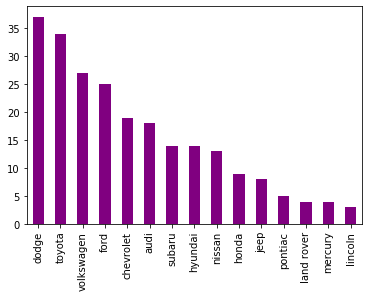

In [170]:
# get the data
df = pd.read_csv(file)

df['manufacturer'].value_counts().plot(kind='bar',color='purple')



### Bar Graph V2<a class="anchor" id="chapter5"></a>

[Go back to the Table of Contents](#table_of_contents)

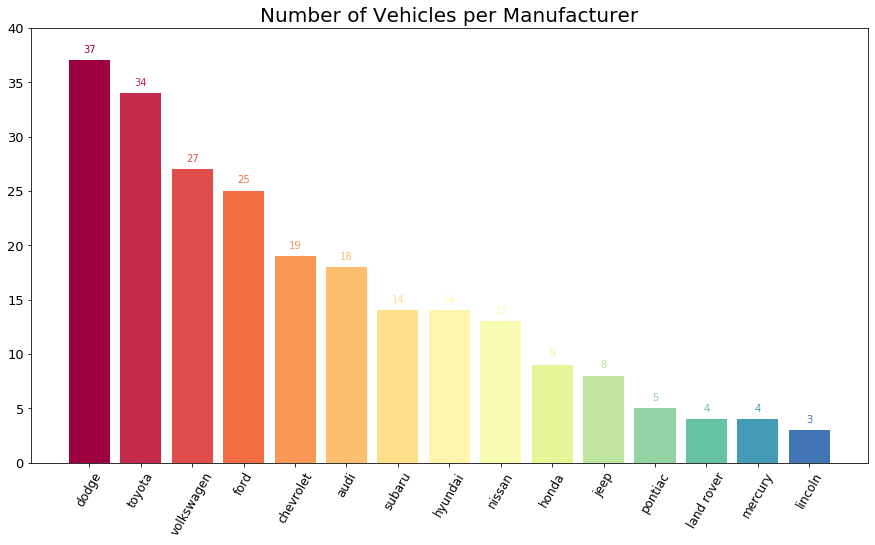

In [171]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
# get a dictionary with x and y from a dictionary
d = df["manufacturer"].value_counts().to_dict()

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(d.keys()))) for i in range(len(d.keys()))]

# instanciate the figure
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot()


# plot the data using matplotlib
ax.bar(d.keys(), d.values(), color = colors)


# iterate over every x and y and annotate the value on the top of the barchart
for i, (key, value) in enumerate(d.items()):
    ax.text(key, # where to put the text on the x coordinates
            value + 1, # where to put the text on the y coordinates
            value, # value to text
            color = colors[i], # color corresponding to the bar
            fontsize = 10, # fontsize
            horizontalalignment = 'center', # center the text to be more pleasant
            verticalalignment = 'center'
           )


# change the size of the x and y ticks
ax.tick_params(axis = 'x', labelrotation = 60, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 13)

# change the ylim
ax.set_ylim(0, 40)

# set a title for the plot
ax.set_title("Number of Vehicles per Manufacturer", fontsize = 20);


### Bar Graph V3<a class="anchor" id="chapter6"></a>

[Go back to the Table of Contents](#table_of_contents)

C:\Users\doron\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


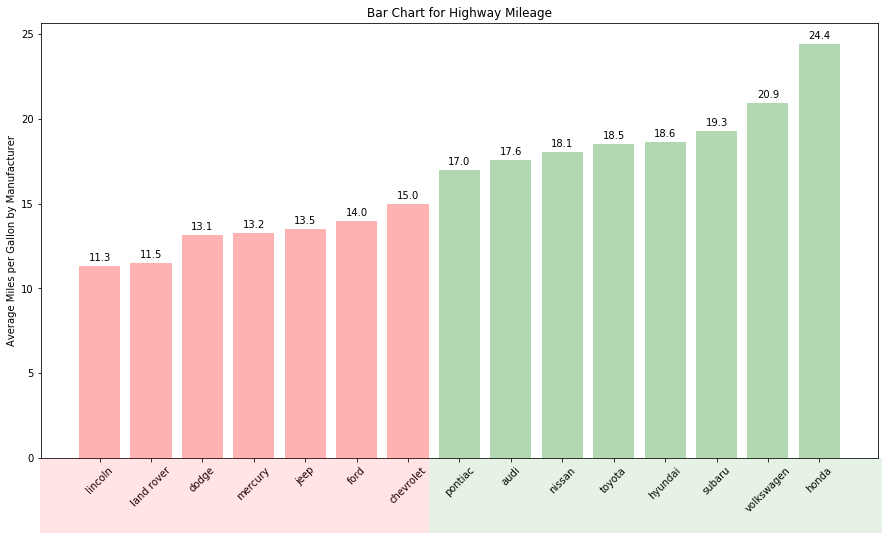

In [172]:
# prepare the data for plotting
# groupby and create the target x and y
gb_df = df.groupby(["manufacturer"])["cyl", "displ", "cty"].mean()
gb_df.sort_values("cty", inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["cty"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for x_, y_ in zip(x, y):
    # this is very cool, since we can pass a function to matplotlib
    # and it will plot the color based on the result of the evaluation
    ax.bar(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3)
    
     # add some text
    ax.text(x_, y_ + 0.3, round(y_, 1), horizontalalignment = 'center')

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# Add a patch below the x axis line to enphasize that they are below the mean
# I had to copy and paste this code, since I didn't manage to figure it out.
# red one
p2 = patches.Rectangle((.124, -0.005), width = .360, height = .13, alpha = .1, facecolor = 'red', transform = fig.transFigure)
fig.add_artist(p2)

# green one
p1 = patches.Rectangle((.124 + .360, -0.005), width = .42, height = .13, alpha = .1, facecolor = 'green', transform = fig.transFigure)
fig.add_artist(p1)

# rotate the x ticks 90 degrees
ax.set_xticklabels(x, rotation=45)

# add an y label
ax.set_ylabel("Average Miles per Gallon by Manufacturer")

# set a title
ax.set_title("Bar Chart for Highway Mileage");

### Distribution Graph<a class="anchor" id="chapter7"></a>

[Go back to the Table of Contents](#table_of_contents)

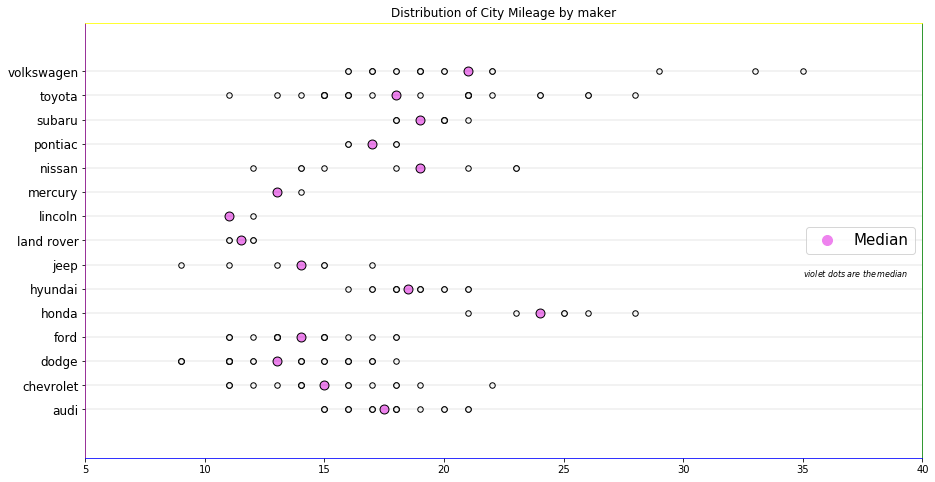

In [173]:
# get the data
df = pd.read_csv(file)

# sort the values
df.sort_values(["manufacturer", "cty"], inplace = True)
lc = []

# instanciate the figure
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot()

# iterate over each car manufacturer
for i, car in enumerate(df["manufacturer"].unique()):
    # prepare the data for plotting
    # get x and y
    x = df[df["manufacturer"] == car]["cty"]
    y = [car for i_ in range(len(x))]
    
    # calculate the median value
    x_median = np.median(x)
    
    # plot the data
    ax.scatter(x, y, c = "white", edgecolor = "black", s = 30)
    ax.scatter(x_median, i, c = "violet",  edgecolor = "black", s = 80)
    
    # add some horizontal line so we can easily track each manufacturer with their distribution
    ax.hlines(i, 0, 40, linewidth = .1)
    
    # append the car name 
    # we need this to change the y labels
    lc.append(car)



# change x and y label
ax.set_xlim(5, 40)
ax.set_ylim(-2, 16)

# change the ylabel fontsize
ax.tick_params(axis = "y", labelsize = 12)

# set a title
ax.set_title("Distribution of City Mileage by maker", fontsize = 12)

# annotate some text that will be placed below the legend
ax.text(35, 5.5, "$violet \; dots \; are \; the \: median$", fontdict={'size':8}, color='black')

# create a custom legend
# a red circe for the median
red_patch = plt.plot([],[], marker = "o", ms = 10, ls = "", mec = None, color = 'violet', label = "Median")

# add the patch and render the legend
plt.legend(handles = red_patch, loc = 7, fontsize = 15)

# remove 3 spines to make a prettier plot
ax.spines["right"].set_color("Green")
ax.spines["left"].set_color("Purple")
ax.spines["bottom"].set_color("Blue")
ax.spines["top"].set_color("yellow");

### BoxPlot<a class="anchor" id="chapter8"></a>

[Go back to the Table of Contents](#table_of_contents)

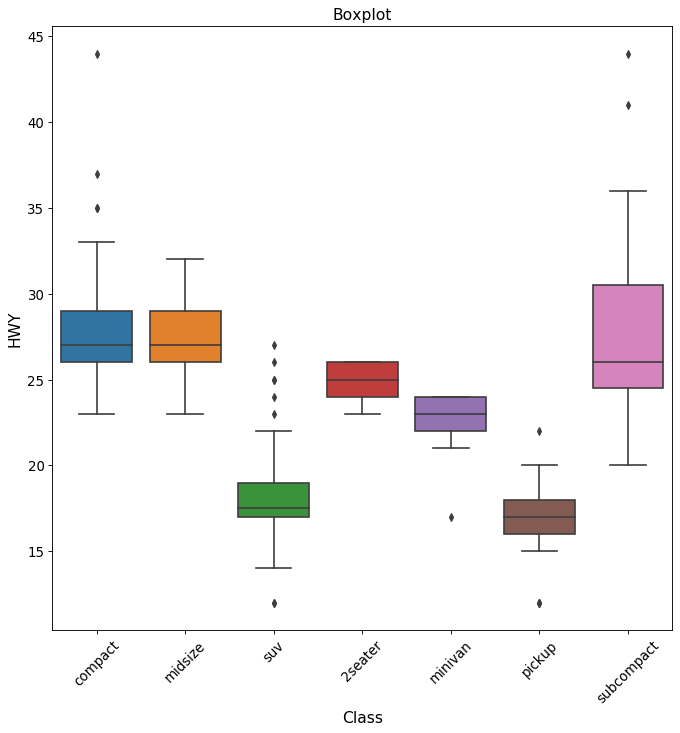

In [174]:
# get the data
df = pd.read_csv(file)

# instanciate the figure
plt.figure(figsize = (10, 10), dpi = 80)
# plot the data using seaborn
ax = sns.boxplot(x = "class", y = "hwy", data = df)



# change the font of the x and y ticks (numbers on the axis)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# set and x and y label
ax.set_xlabel("Class", fontsize = 14)
ax.set_ylabel("HWY", fontsize = 14)

# set a title
ax.set_title("Boxplot", fontsize = 14);

### BoxPlot V2<a class="anchor" id="chapter9"></a>

[Go back to the Table of Contents](#table_of_contents)

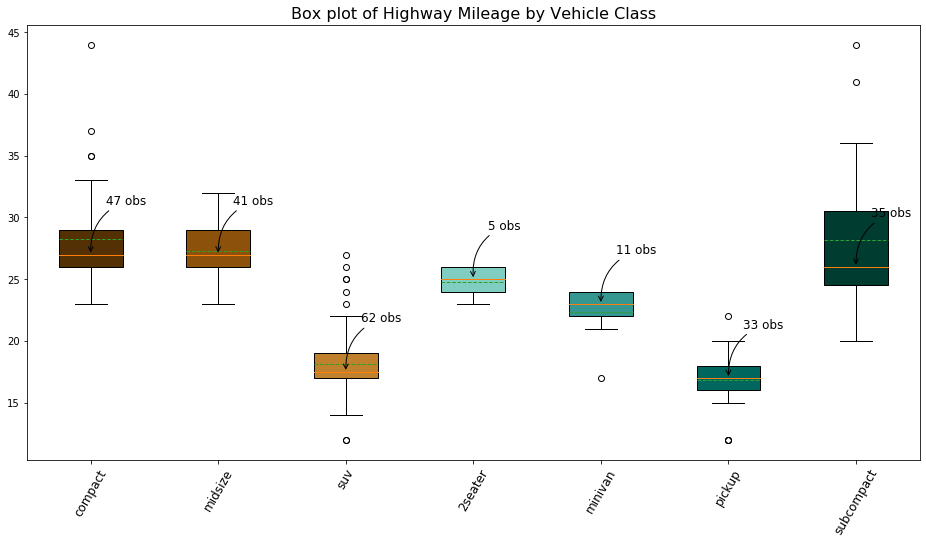

In [175]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting

# vectors to plot
vects = [df[df["class"] == car]["hwy"] for car in df["class"].unique()]

# labels for the x axis
labels = [class_ for class_ in df["class"].unique()]

# handpicked colors
colors = ["#543005", "#8c510a", "#bf812d", "#80cdc1", "#35978f", "#01665e", "#003c30"]

# instanciate the figure
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

# plot the data using matplotlib
plot1 = ax.boxplot(vects,
    notch = False, 
    vert = True,
    meanline = True,
    showmeans = True,
    patch_artist=True
)

# iterate over every box and add some annotations
for box, color, vect, label, tick in zip(plot1["boxes"], # using this line, you can iterate over every box
                                         colors, 
                                         vects, 
                                         labels, 
                                         ax.get_xticks()):
    # change the color of the box
    box.set(facecolor = color)
    # add text
    ax.annotate("{} obs".format(len(vect)), 
                xy = (tick, np.median(vect)),
               xytext = (15, 50),
               textcoords = "offset points",
               arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.35"),
               fontsize = 12)


# change the x labels
ax.set_xticklabels(labels = labels)

# change the rotation and the size of the x ticks (numbers of x axis)
ax.tick_params(axis = 'x', labelrotation = 60, labelsize = 12)

# set the title for the plot
ax.set_title("Box plot of Highway Mileage by Vehicle Class", fontsize = 16);

### Violin Plot<a class="anchor" id="chapter10"></a>

[Go back to the Table of Contents](#table_of_contents)

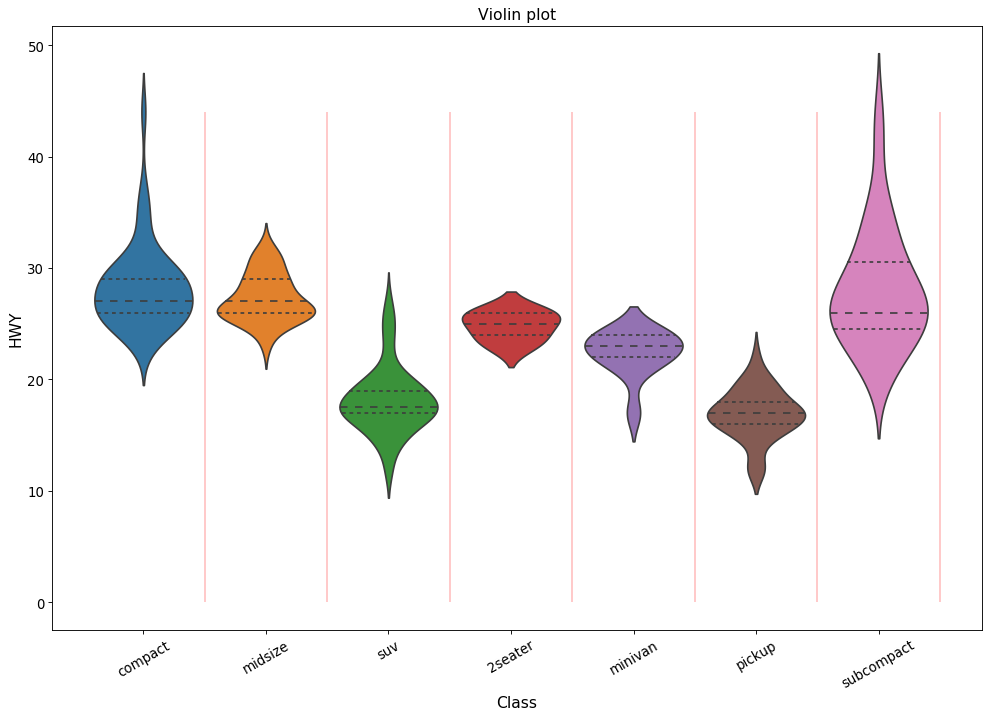

In [176]:
# get the data
df = pd.read_csv(file)

# instanciate the figure
plt.figure(figsize = (15, 10), dpi= 80)
sns.violinplot(x = "class", 
               y = "hwy", 
               data = df, 
               scale = 'width', 
               inner = 'quartile'
              )



# get the current figure
ax = plt.gca()
# get the xticks to iterate over
xticks = ax.get_xticks()

# iterate over every xtick and add a vertical line
# to separate different classes
for tick in xticks:
    ax.vlines(tick + 0.5, 0, np.max(df["hwy"]), color = "red", alpha = .25)
    
# rotate the x and y ticks
ax.tick_params(axis = 'x', labelrotation = 30, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# add x and y label
ax.set_xlabel("Class", fontsize = 14)
ax.set_ylabel("HWY", fontsize = 14)

# set title
ax.set_title("Violin plot", fontsize = 14);

### Violin Plot V2<a class="anchor" id="chapter11"></a>

[Go back to the Table of Contents](#table_of_contents)

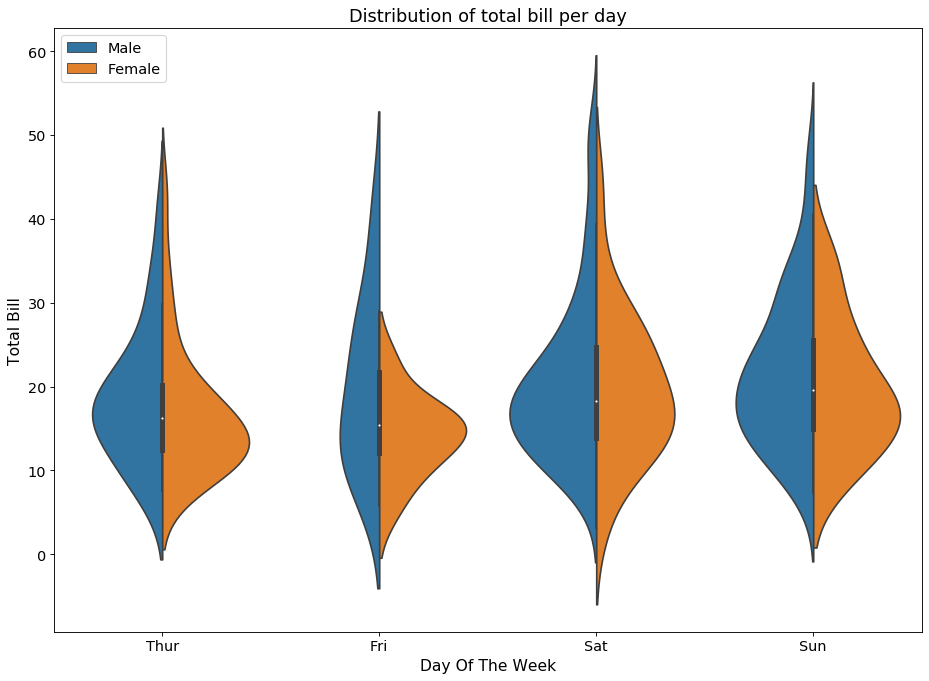

In [177]:
#load data from https://github.com/mwaskom/seaborn-data
tips = sns.load_dataset("tips")

# instanciate the figure
plt.figure(figsize = (14, 10), dpi= 80)

# plot the data using seaborn

# we put split = True and we have 4 "double" violin plots instead of 8 "single"
ax = sns.violinplot(x = "day", y = "total_bill", hue = "sex", split = True, data = tips)

# add x and y label
ax.set_xlabel("Day Of The Week", fontsize = 14)
ax.set_ylabel("Total Bill", fontsize = 14)

# rotate the x and y ticks
ax.tick_params(axis = 'x', labelsize = 13)
ax.tick_params(axis = 'y', labelsize = 13)

# set a title and change the legend location
ax.set_title('Distribution of total bill per day', fontsize = 16)
ax.legend(loc = "upper left", fontsize = 13);

### Density Plot<a class="anchor" id="chapter12"></a>

[Go back to the Table of Contents](#table_of_contents)

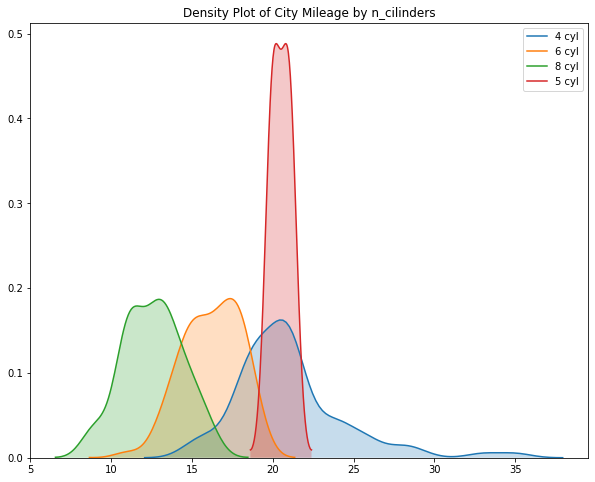

In [178]:
# get the data
df = pd.read_csv(file)

# instanciate the figure
fig = plt.figure(figsize = (10, 8))

# plot the data
# the idea is to iterate over each class extract their data and plot a sepate density plot
for cyl_ in df["cyl"].unique():
    # extract the data
    x = df[df["cyl"] == cyl_]["cty"]
    # plot the data using seaborn
    sns.kdeplot(x, shade=True, label = "{} cyl".format(cyl_))

# set the title of the plot
plt.title("Density Plot of City Mileage by n_cilinders");

### Density Plot V2<a class="anchor" id="chapter13"></a>

[Go back to the Table of Contents](#table_of_contents)

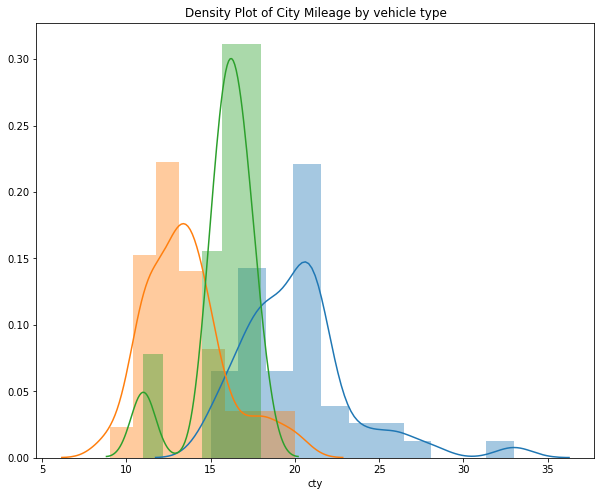

In [179]:
# get the data
df = pd.read_csv(file)

# instanciate the figure
fig = plt.figure(figsize = (10, 8))

# plot the data
# the idea is to iterate over each class extract their data and plot a sepate density plot with their histogram
for class_ in ["compact", "suv", "minivan"]:
    # extract the data
    x = df[df["class"] == class_]["cty"]
    # plot the data using seaborn
    sns.distplot(x, kde = True, label = "{} class".format(class_))
    
# set the title of the plot
plt.title("Density Plot of City Mileage by vehicle type");

### Waffle Chart<a class="anchor" id="chapter14"></a>

[Go back to the Table of Contents](#table_of_contents)

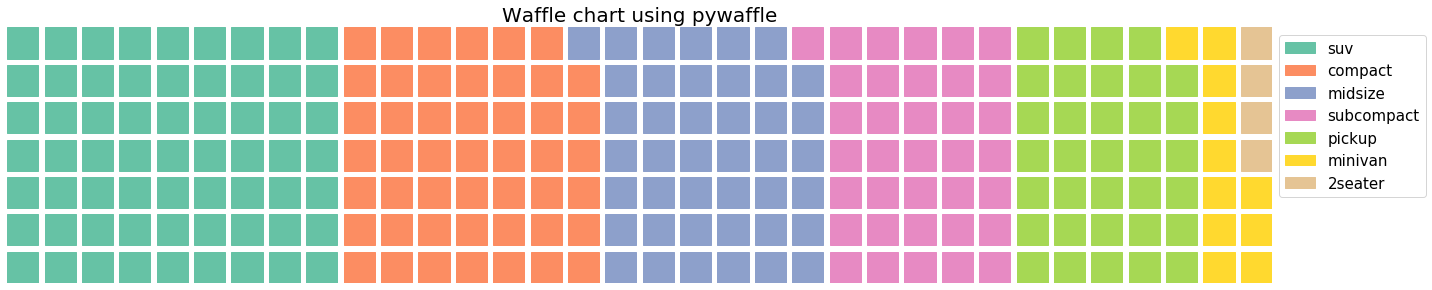

In [180]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
# create a dictionary of each class and their totals
values = {k:v for k,v in zip(df["class"].value_counts().index, df["class"].value_counts().values)}

# ----------------------------------------------------------------------------------------------------
# plot the data using pywaffle
plt.figure(
    FigureClass = Waffle,
    rows = 7,
    columns = 34,
    values = values,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1), "fontsize": "15"},
    figsize = (20, 7)
)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set a title
plt.title("Waffle chart using pywaffle", fontsize = 20);

### Pie Chart<a class="anchor" id="chapter15"></a>

[Go back to the Table of Contents](#table_of_contents)

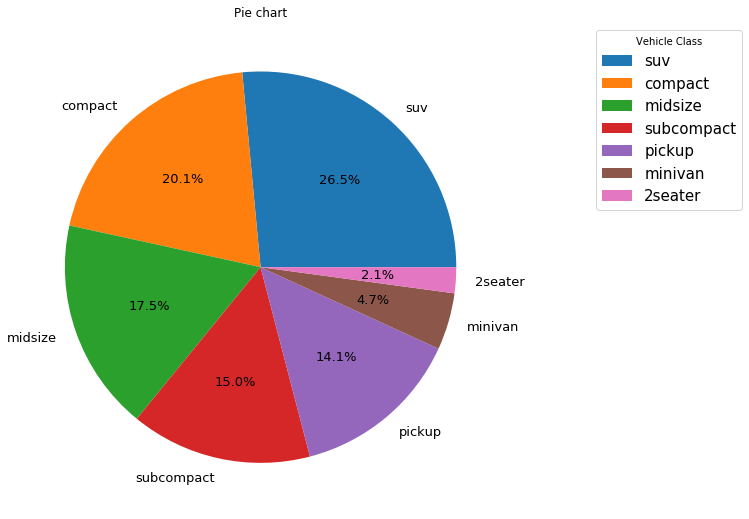

In [181]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
# create a dictionary of classes and their totals
d = df["class"].value_counts().to_dict()

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (18, 9))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
ax.pie(d.values(), # pass the values from our dictionary
       labels = d.keys(), # pass the labels from our dictonary
       autopct = '%1.1f%%', # specify the format to be plotted
       textprops = {'fontsize': 13, 'color' : "black"} # change the font size and the color of the numbers inside the pie
      )



# set the title
ax.set_title("Pie chart")

# set the legend and add a title to the legend
ax.legend(loc = "upper right", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 15, title = "Vehicle Class");

### Tree Map<a class="anchor" id="chapter16"></a>

[Go back to the Table of Contents](#table_of_contents)

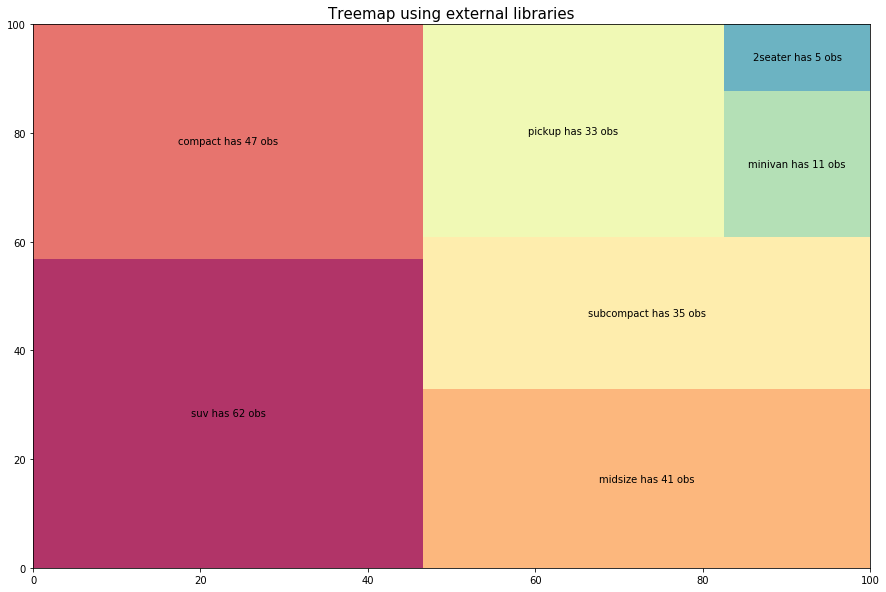

In [182]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
# get the values
label_value = df["class"].value_counts().to_dict()

# create the labels using a list comprehesion
labels = ["{} has {} obs".format(class_, obs) for class_, obs in label_value.items()]

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# instanciate the figure
plt.figure(figsize = (15, 10))

# plot the data using squarify
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)

# add a title to the plot
plt.title("Treemap using external libraries",fontsize = 15);

### Scatter plot with linear regression line<a class="anchor" id="chapter17"></a>

[Go back to the Table of Contents](#table_of_contents)

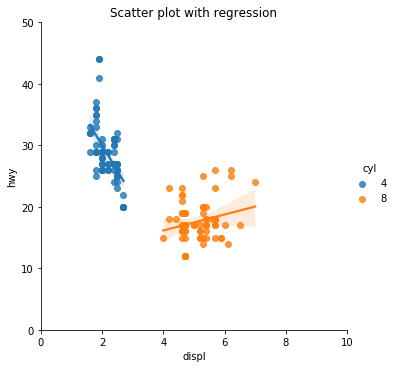

In [183]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
# filter only 2 clases to separate it more easily on the plot
df = df[df["cyl"].isin([4,8])]

# plot the data using seaborn
sns.lmplot("displ", "hwy", df, hue = "cyl")


# since we are using seaborn and this library uses matplotlib behind the scenes
# you can call plt.gca (get current axes) and use all the familiar matplotlib commands
ax = plt.gca()

# change the upper limit of the plot to make it more pleasant
ax.set_xlim(0, 10)
ax.set_ylim(0, 50)

# set title
ax.set_title("Scatter plot with regression");

### Scatter plot with linear regression line V2<a class="anchor" id="chapter18"></a>

[Go back to the Table of Contents](#table_of_contents)

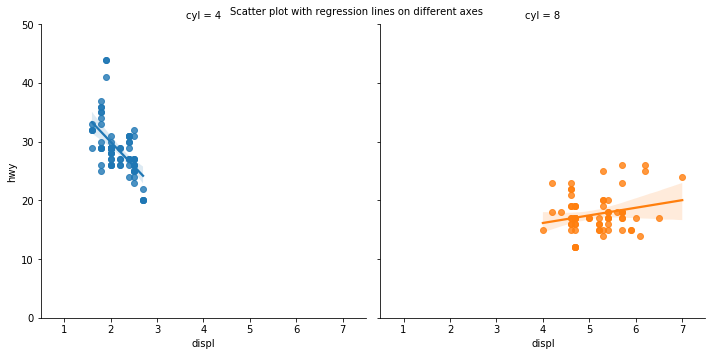

In [184]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
# filter only 2 clases to separate it more easily on the plot
df = df[df["cyl"].isin([4,8])]


# plot the data using seaborn
axes = sns.lmplot("displ", 
                  "hwy", 
                  df, 
                  hue = "cyl", 
                  col = "cyl" # by specifying the col, seaborn creates several axes for each group
                 )


# change the upper limit of the plot to make it more pleasant
axes.set( xlim = (0.5, 7.5), ylim = (0, 50))

# set title for all axes using plt
plt.suptitle("Scatter plot with regression lines on different axes", fontsize = 10);

### Jitter Plot<a class="anchor" id="chapter19"></a>

[Go back to the Table of Contents](#table_of_contents)

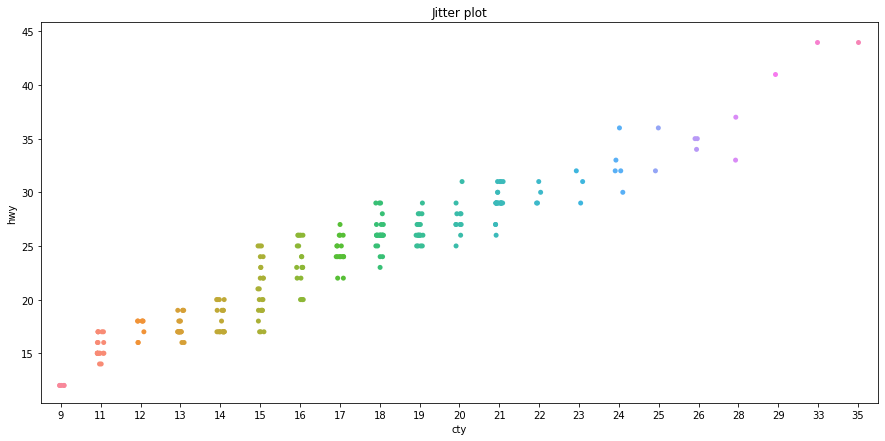

In [185]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
# separate x and y variables
x = df["cty"]
y = df["hwy"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (15, 7))

# ----------------------------------------------------------------------------------------------------
# plot the data using seaborn
ax = sns.stripplot(x, y)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set title
ax.set_title("Jitter plot");

### Counts Plot<a class="anchor" id="chapter20"></a>

[Go back to the Table of Contents](#table_of_contents)

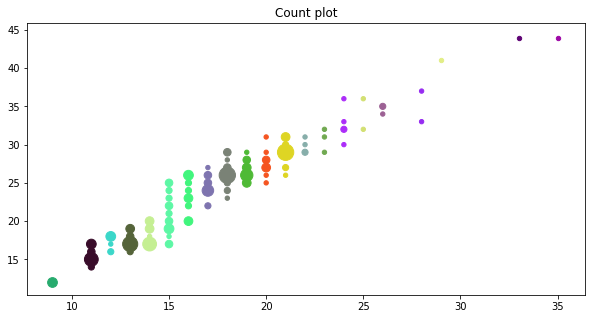

In [186]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting

# we need to make a groupby by variables of interest
gb_df = df.groupby(["cty", "hwy"]).size().reset_index(name = "counts")

# sort the values
gb_df.sort_values(["cty", "hwy", "counts"], ascending = True, inplace = True)

# create a color for each group. 
# there are several way os doing, you can also use this line: 
# colors = [plt.cm.gist_earth(i/float(len(gb_df["cty"].unique()))) for i in range(len(gb_df["cty"].unique()))]
colors = {i:np.random.random(3,) for i in sorted(list(gb_df["cty"].unique()))}

# instanciate the figure
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

# iterate over each category and plot the data. This way, every group has it's own color and sizwe.
for x in sorted(list(gb_df["cty"].unique())):
    
    # get x and y values for each group
    x_values = gb_df[gb_df["cty"] == x]["cty"]
    y_values = gb_df[gb_df["cty"] == x]["hwy"]
    
    # extract the size of each group to plot
    size = gb_df[gb_df["cty"] == x]["counts"]
    
    # extract the color for each group and covert it from rgb to hex
    color = matplotlib.colors.rgb2hex(colors[x])
    
    # plot the data
    ax.scatter(x_values, y_values, s = size*19, c = color)
    

# set title
ax.set_title("Count plot");

### Lolipop Chart<a class="anchor" id="chapter21"></a>

[Go back to the Table of Contents](#table_of_contents)

C:\Users\doron\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


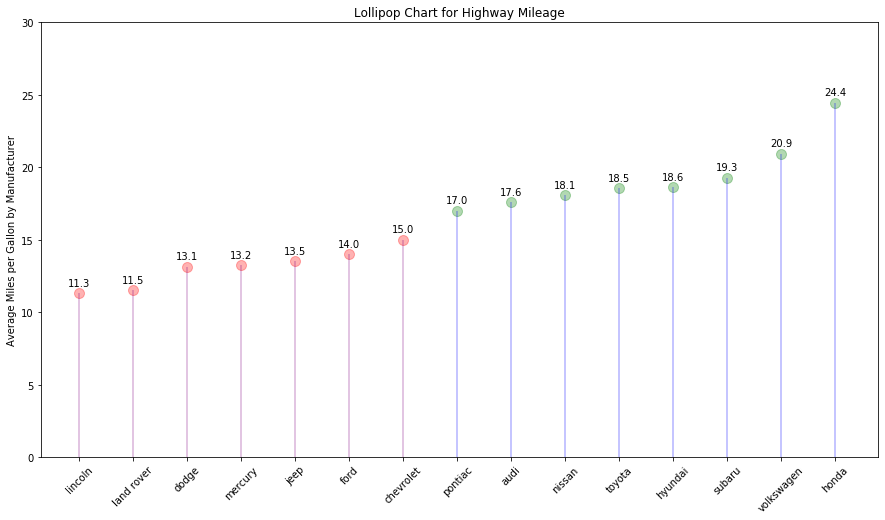

In [187]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
# groupby and create the target x and y
gb_df = df.groupby(["manufacturer"])["cyl", "displ", "cty"].mean()
gb_df.sort_values("cty", inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["cty"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for x_, y_ in zip(x, y):
    # make a scatter plot
    ax.scatter(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3, s = 100)
    
    # add vertical lines to connect them to the data point (head of the lollipop)
    ax.vlines(x_, ymin = 0, ymax = y_, color = "purple" if y_ < y.mean() else "blue", alpha = 0.3)
    
    # add text with the data
    ax.text(x_, y_ + 0.5, round(y_, 1), horizontalalignment='center')
    
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# change the ylim
ax.set_ylim(0, 30)

# rotate the x ticks 90 degrees
ax.set_xticklabels(x, rotation = 45)

# add an y label
ax.set_ylabel("Average Miles per Gallon by Manufacturer")

# set a title
ax.set_title("Lollipop Chart for Highway Mileage");

### Dot Chart<a class="anchor" id="chapter22"></a>

[Go back to the Table of Contents](#table_of_contents)

C:\Users\doron\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


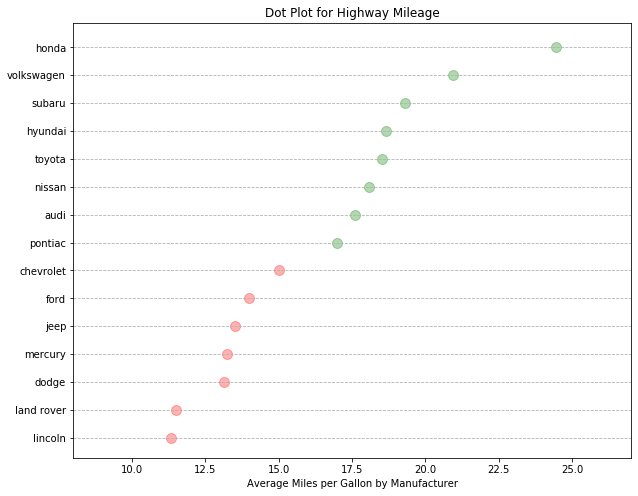

In [188]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
# groupby and create the target x and y
gb_df = df.groupby(["manufacturer"])["cyl", "displ", "cty"].mean()
gb_df.sort_values("cty", inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["cty"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for x_, y_ in zip(x, y):
    ax.scatter(y_, x_, color = "red" if y_ < y.mean() else "green", alpha = 0.3, s = 100)
    
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# change the xlim
ax.set_xlim(8, 27)

# add an y label
ax.set_xlabel("Average Miles per Gallon by Manufacturer")

# set the title
ax.set_title("Dot Plot for Highway Mileage")

# create the grid only for the y axis
ax.grid(which = 'major', axis = 'y', linestyle = '--');

### Histogram for continuous variable<a class="anchor" id="chapter23"></a>

[Go back to the Table of Contents](#table_of_contents)

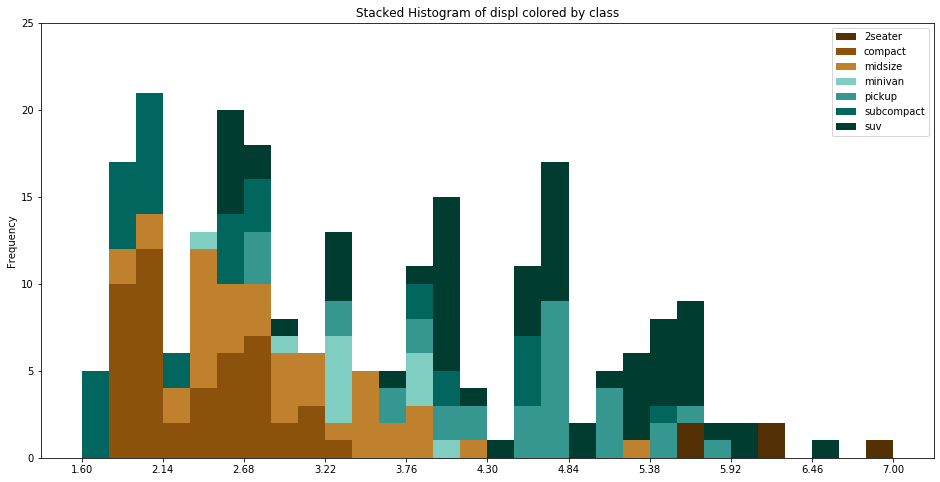

In [189]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
gb_df = df[["class", "displ"]].groupby("class")
lx = []
ln = []

# handpicked colors
colors = ["#543005", "#8c510a", "#bf812d", "#80cdc1", "#35978f", "#01665e", "#003c30"]

# iterate over very groupby group and 
# append their values as a list
# THIS IS A CRUCIAL STEP
for _, df_ in gb_df:
    lx.append(df_["displ"].values.tolist())
    ln.append(list(set(df_["class"].values.tolist()))[0])

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data

# hist returns a tuple of 3 values
# let's unpack it
n, bins, patches = ax.hist(lx, bins = 30, stacked = True, density = False, color = colors)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change x lim
ax.set_ylim(0, 25)
# set the xticks to reflect every third value
ax.set_xticks(bins[::3])

# set a title
ax.set_title("Stacked Histogram of displ colored by class")

# add a custom legend wit class and color
# you have to pass a dict
ax.legend({class_:color for class_, color in zip(ln, colors)})

# set the y label
ax.set_ylabel("Frequency");

### Histogram for continuous variable V2<a class="anchor" id="chapter24"></a>

[Go back to the Table of Contents](#table_of_contents)

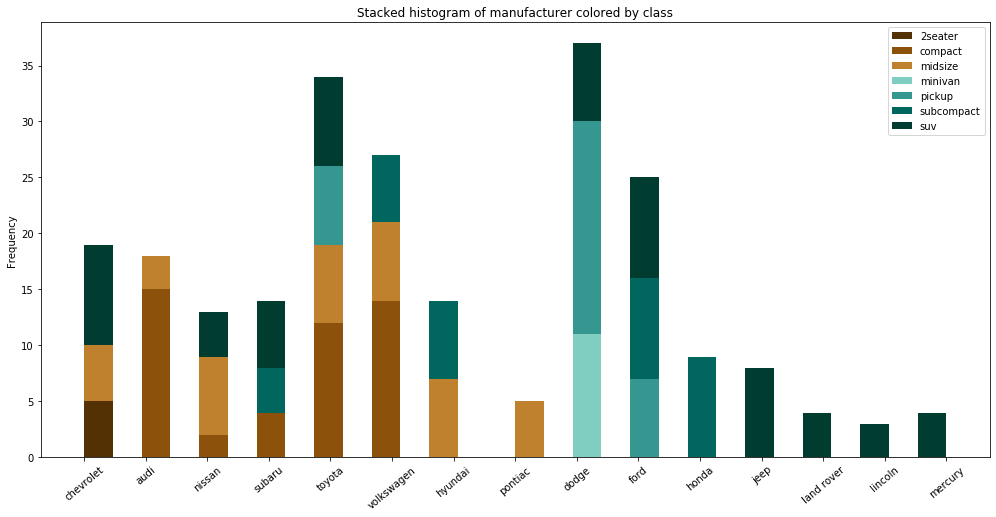

In [190]:
# get the data
df = pd.read_csv(file)

# prepare the data for plotting
gb_df = df[["class", "manufacturer"]].groupby("class")
lx = []
ln = []

# handpicked colors
colors = ["#543005", "#8c510a", "#bf812d", "#80cdc1", "#35978f", "#01665e", "#003c30"]

# iterate over very groupby group and 
# append their values as a list
# THIS IS A CRUCIAL STEP
for _, df_ in gb_df:
    lx.append(df_["manufacturer"].values.tolist())
    ln.append(list(set(df_["class"].values.tolist()))[0])

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (17, 8))
ax = fig.add_subplot()

# hist returns a tuple of 3 values
# let's unpack it
n, bins, patches = ax.hist(lx, bins = 30, stacked = True, density = False, color = colors)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# rotate the x axis label
ax.tick_params(axis = 'x', labelrotation = 40)

# add a custom legend wit class and color
# you have to pass a dict
ax.legend({class_:color for class_, color in zip(ln, colors)})

# add a title
ax.set_title("Stacked histogram of manufacturer colored by class")

# set an y label
ax.set_ylabel("Frequency");

### Timeseries<a class="anchor" id="chapter25"></a>

[Go back to the Table of Contents](#table_of_contents)

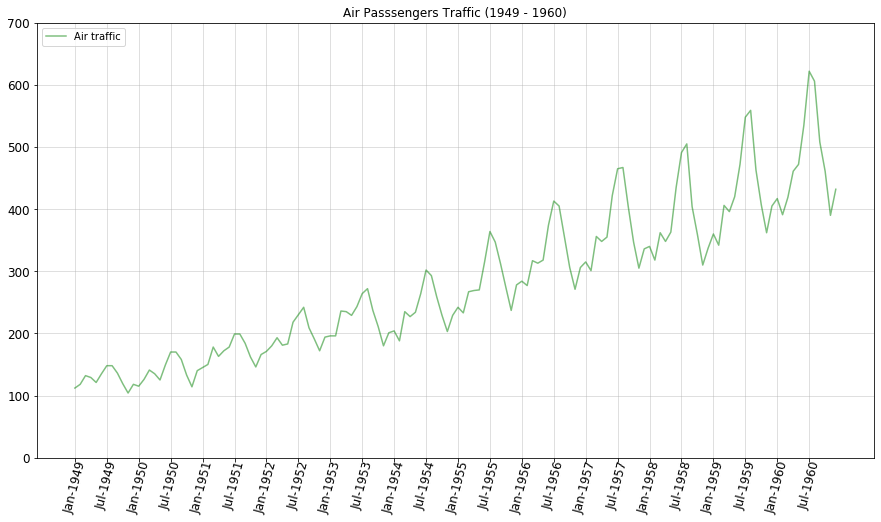

In [191]:
# get the data
df = pd.read_csv(file2)

# prepare the data for plotting

# helper function to transform and work with the time column
def create_date_tick(df):
    '''
    Converts dates from this format: Timestamp('1949-01-01 00:00:00')
    To this format: 'Jan-1949'
    '''
    df["date"] = pd.to_datetime(df["date"]) # convert to datetime
    df["month_name"] = df["date"].dt.month_name() # extracts month_name
    df["month_name"] = df["month_name"].apply(lambda x: x[:3]) # convert month name to 3 letters 
    df["year"] = df["date"].dt.year # extracts year
    df["new_date"] = df["month_name"].astype(str) + "-" + df["year"].astype(str) # Concatenaes Jan and year --> Jan-1949

# create the time column and the xtickslabels column
create_date_tick(df)

# get the y values (the x is the index of the series)
y = df["value"]

# instanciate the figure
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot()


# plot the data using matplotlib
ax.plot(y, color = "green", alpha = .5, label = "Air traffic")


# set the gridlines
ax.grid(alpha = .5)

# change the ylim
ax.set_ylim(0, 700)

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::6]
xtick_labels = df["new_date"].tolist()[::6]

# every 6 months
ax.set_xticks(xtick_location)

# chage the label from '1949-01-01 00:00:00' to this 'Jan-1949'
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# change the size of the font of the x and y axis
ax.tick_params(axis = 'x', labelrotation = 75, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# set the title and the legend of the plot
ax.set_title("Air Passsengers Traffic (1949 - 1960)", fontsize = 12)
ax.legend(loc = "upper left", fontsize = 10);

### Timeseries V2 (with Peaks)<a class="anchor" id="chapter26"></a>

[Go back to the Table of Contents](#table_of_contents)

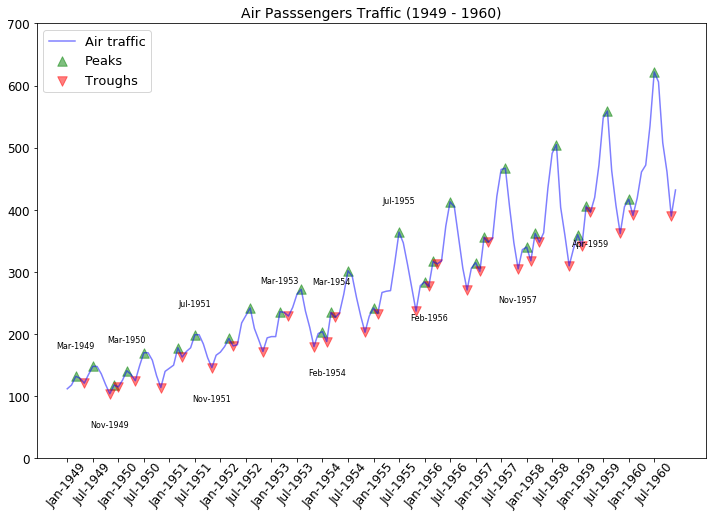

In [192]:
# get the data
df = pd.read_csv(file2)

# prepare the data for plotting

# helper function to transform and work with the time column
def create_date_tick(df):
    '''
    Converts dates from this format: Timestamp('1949-01-01 00:00:00')
    To this format: 'Jan-1949'
    '''
    df["date"] = pd.to_datetime(df["date"]) # convert to datetime
    df["month_name"] = df["date"].dt.month_name() # extracts month_name
    df["month_name"] = df["month_name"].apply(lambda x: x[:3]) # passes from January to Jan
    df["year"] = df["date"].dt.year # extracts year
    df["new_date"] = df["month_name"].astype(str) + "-" + df["year"].astype(str) # Concatenaes Jan and year --> Jan-1949

# create the time column and the xtickslabels column
create_date_tick(df)

# get the y values (the x is the index of the series)
y = df["value"]

# find local maximum INDEX using scipy library
max_peaks_index, _ = find_peaks(y, height=0) 

# find local minimum INDEX using numpy library
doublediff2 = np.diff(np.sign(np.diff(-1*y))) 
min_peaks_index = np.where(doublediff2 == -2)[0] + 1

# instanciate the figure
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()

# plot the data using matplotlib
ax.plot(y, color = "blue", alpha = .5, label = "Air traffic")

# we have the index of max and min, so we must index the values in order to plot them
ax.scatter(x = y[max_peaks_index].index, y = y[max_peaks_index].values, marker = "^", s = 90, color = "green", alpha = .5, label = "Peaks")
ax.scatter(x = y[min_peaks_index].index, y = y[min_peaks_index].values, marker = "v", s = 90, color = "red", alpha = .5, label = "Troughs")

# iterate over some max and min in order to annotate the values
for max_annot, min_annot in zip(max_peaks_index[::3], min_peaks_index[1::5]):
    
    # extract the date to be plotted for max and min
    max_text = df.iloc[max_annot]["new_date"]
    min_text = df.iloc[min_annot]["new_date"]
    
    # add the text
    ax.text(df.index[max_annot], y[max_annot] + 50, s = max_text, fontsize = 8, horizontalalignment = 'center', verticalalignment = 'center')
    ax.text(df.index[min_annot], y[min_annot] - 50, s = min_text, fontsize = 8, horizontalalignment = 'center', verticalalignment = 'center')



# change the ylim
ax.set_ylim(0, 700)

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::6]
xtick_labels = df["new_date"].tolist()[::6]

# every 6 months
ax.set_xticks(xtick_location)

# chage the label from '1949-01-01 00:00:00' to this 'Jan-1949'
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# change the size of the font of the x and y axis
ax.tick_params(axis = 'x', labelrotation = 50, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# set the title and the legend of the plot
ax.set_title("Air Passsengers Traffic (1949 - 1960)", fontsize = 14)
ax.legend(loc = "upper left", fontsize = 13);

### Seasonal plot<a class="anchor" id="chapter27"></a>

[Go back to the Table of Contents](#table_of_contents)

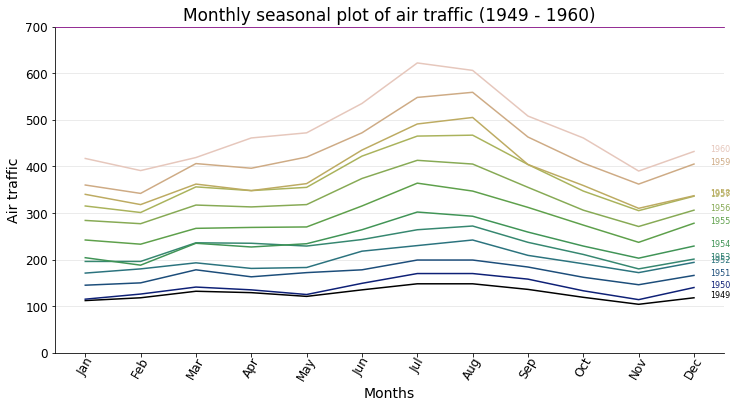

In [193]:
# get the data
df = pd.read_csv(file2)

# prepare the data for plotting


# create a repeating index of [1, 2, 3, .. 12] months x 12 times (12 years)
index_ = [i for i in range(1, 13)]*12

# set the index into the dataframe
df["index_"] = index_

# create a dictionary with the months name (we will use this later to change the x axis)
months_ = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
d = {k:v for k,v in zip(index_[:12], months_)}

# convert to datetime the date column
df["date"] = pd.to_datetime(df["date"])

# extract the year using pandas datatime (dt)
df["year"] = df["date"].dt.year

# drop the date
df.drop("date", inplace = True, axis = 1)

# create a pivot table
# traspose the rows into columns, where the columns name are the year to plot
df = df.pivot(values = "value", columns = "year", index = "index_")

# create n colors for each season
colors = [plt.cm.gist_earth(i/float(len(df.columns))) for i in range(len(df.columns))]

# get the x to plot
# since we are extracting it from our new df
# it has 12 values, one for each month
x = df.index

# instanciate the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot()

# plot the data
# iterate over every column in the dataframe and plot the data
for col, color in zip(df.columns, colors):
    # get the y to plot
    y = df[col]
    
    # plot the data using seaborn
    ax.plot(x, y, label = col, c = color)
    
    # get the x and y to annotate
    x_annotate = x[-1]
    y_annotate = df.iloc[11][col]
    
    # annotate at the end of each line some values
    ax.text(x_annotate + 0.3, y_annotate, col, fontsize = 8, c = color)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set the x and y label
ax.set_xlabel("Months", fontsize = 14)
ax.set_ylabel("Air traffic", fontsize = 14)

# extract the x ticks location
xtick_location = df.index.tolist()

# using our dictionary, create a list of new xlabels
# basically instead of numbers, strings of months
months = [d[tick] for tick in xtick_location]

# change the x ticks with our new x ticks labels
ax.set_xticks(xtick_location)
ax.set_xticklabels(months, rotation = 60, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center_baseline', "fontsize":"12"})

# change the y ticks font size
ax.tick_params(axis = 'y', labelsize = 12)

# change the y limit to make the plot a little bigger
ax.set_ylim(0, 700)

# get rid of spines from our plot
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("purple")

# add a grid to the plot
ax.grid(axis = "y", alpha = .3)

# set the title for the plot
ax.set_title("Monthly seasonal plot of air traffic (1949 - 1960)", fontsize = 17);